# KLASIFIKASI PASIEN STROKE

Klasifikasi pasien stroke menggunakan logistic regression algorithm.

## 1. Data Exploration

Import data dan melihat isi dari dataset.

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Data processing library
import pandas as pd
import numpy as np
import seaborn as sns

# Encoding
from sklearn.preprocessing import LabelEncoder

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Classification model library
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [47]:
# Membaca file .csv yang ada pada github

url = 'https://raw.githubusercontent.com/ajur-ajur/AI-Big-Data/main/Healthcare%20Classification/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

In [48]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


12 Kolom dan 5110 Baris:
|Kolom|Arti|
|---|---|
|id|Nomor pasien|
|gender|Jenis kelamin pasien|
|age|Umur pasien|
|hypertension|Penderita hipertensi (darah tinggi), 1 = penderita, 0 = bukan|
|heart_disease|Penderita penyakit jantung, 1 = penderita, 0 = bukan|
|ever_married|Pernah menikah|
|work_type|Tipe pekerja|
|Residence_type|Jenis tempat tinggal|
|avg_glucose_level|Rata-rata gula darah|
|bmi|Nilai BMI pasien|
|smoking_status|Status perokok|
|stroke|Merupakan pasian stroke, 1 = penderita, 0 = bukan|

In [50]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Text(0.5, 1.0, 'Persentase Sehat dan Pengidap Stroke')

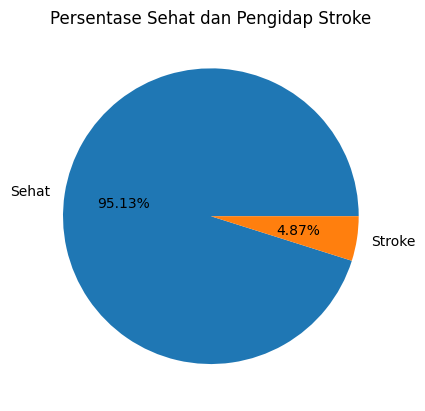

In [51]:
import matplotlib.pyplot as plt

labels = 'Sehat', 'Stroke'
healthy = df['stroke'].value_counts()[0]
stroke = df['stroke'].value_counts()[1]
sizes = [healthy, stroke]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Persentase Sehat dan Pengidap Stroke')

In [52]:
print('Pasien sehat: ', healthy)
print('Pasien stroke: ', stroke)

Pasien sehat:  4861
Pasien stroke:  249


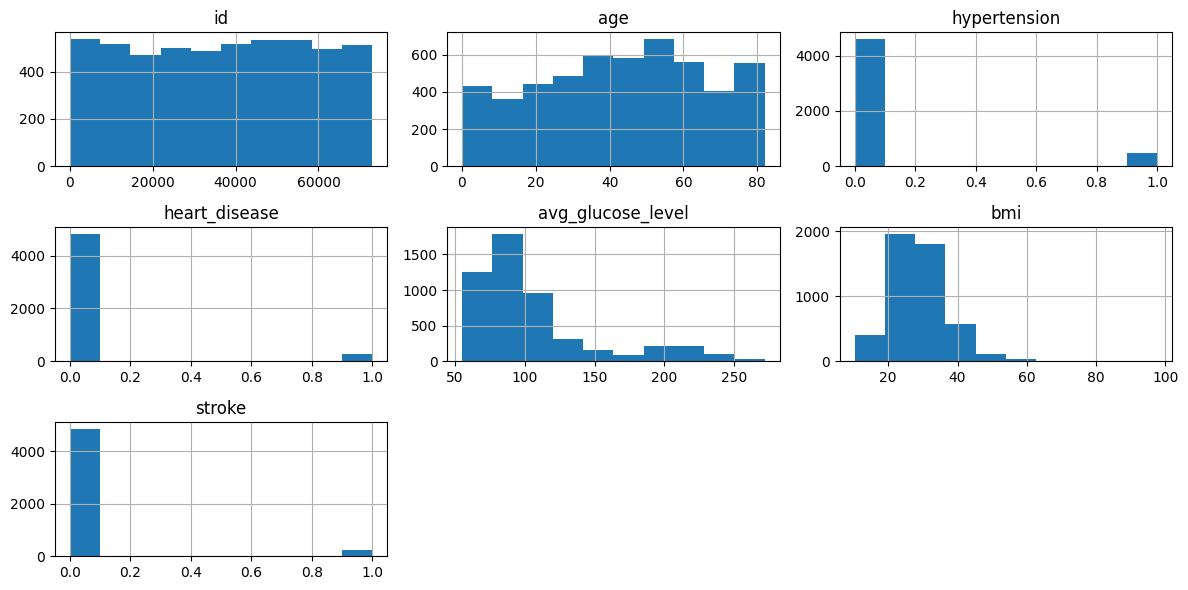

In [53]:
df.hist(figsize=(12,6))
plt.tight_layout()
plt.show()

<Axes: >

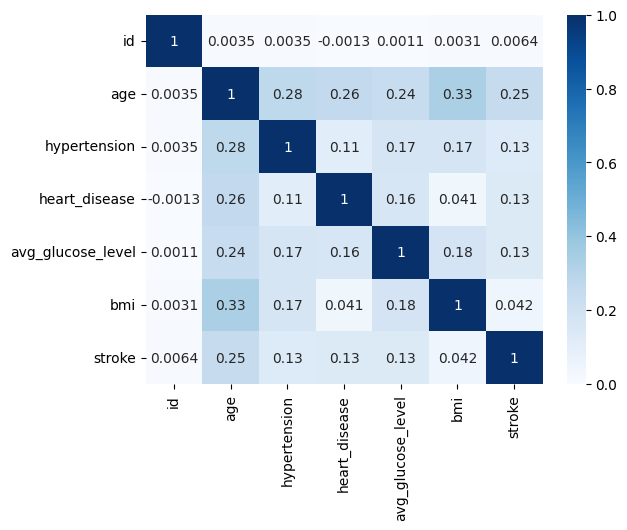

In [54]:
matrix = df.corr(numeric_only=True)
sns.heatmap(matrix, cmap='Blues', annot=True)

Hasil korelasi hanya menunjukkan bmi yang berkorelasi dengan umur, sisanya memiliki nilai kecil dalam korelasi.

## 2. Data Preprocessing

In [55]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Terdapat nilai kosong sebanyak 201 baris pada bmi.

In [56]:
# Mengisi nilai kosong pada bmi dengan metode forward fill (ffill)
# ffill mengisi nilai kosong dengan nilai sebelumnya

df.ffill(inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [57]:
# Membuat dataframe fitur (fd_X) dan dataframe target (df_y)
# df_X -> drop seluruh kolom kecuali bmi, karena bmi memiliki nilai korelasi terbesar
# df_y -> hanya mengambil status bool 'stroke' karena kolom tersebut adalah target yang akan dijadikan klasifikasi

df_X = df.drop(['id', 'stroke', 'gender', 'hypertension',
                'heart_disease', 'ever_married', 'work_type',
                'Residence_type', 'avg_glucose_level', 'smoking_status'], axis = 1)
df_y = df['stroke']

In [58]:
# Encoding pada target dataframe, label encoder digunakan untuk normalisasi label
# Pada kasus ini sebenarnya dataset sudah ternormalisasi, dilakukan untuk jaga-jaga
# 1 = penderita stroke, 0 = sehat

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df_y)

# Line di bawah hanya mengambil cats, atau categorical features
# Pada kasus ini, cats akan diisi dengan setiap kolom yang memiliki tipe data 'int' dan 'float' pada df_X

cats = df_X.select_dtypes(include=['int', 'float']).columns
cat_features = list(cats.values)

In [59]:
# Splitting data menjadi train dan test
# Ukuran test sebesar 25% dari data, maka train 75%

X= df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=404)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3. Data Training and Prediction

In [60]:
# Inisialisasi model yang akan digunakan untuk klasifikasi

model_logres = LogisticRegression()             # Logistic regression
model_svc = SVC(kernel="linear")                # Support Vector Machine Classifier
model_dtc = DecisionTreeClassifier()            # Decission Tree Classifier
model_knn = KNeighborsClassifier(n_neighbors=5) # K-Nearest Neighbor Classifier

# Model fitting

model_logres.fit(X_train, y_train)
model_svc.fit(X_train, y_train)
model_dtc.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

# Model predict

y_pred_logres = model_logres.predict(X_test)
y_pred_svc = model_svc.predict(X_test)
y_pred_dtc = model_dtc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

### A. Hasil Logistic Regression

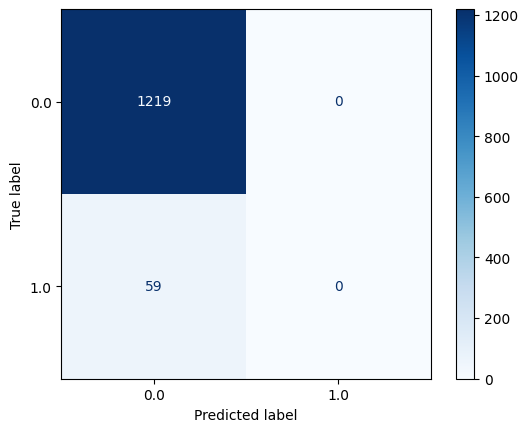

In [61]:
cm = confusion_matrix(y_test, y_pred_logres)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

In [62]:
print('---------- LOGISTIC REGRESSION ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_logres))
print('Precision ', precision_score(y_test, y_pred_logres, average='macro'))
print('Recall ', recall_score(y_test, y_pred_logres, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_logres, average='macro'))

---------- LOGISTIC REGRESSION ----------
Accuracy  0.9538341158059468
Precision  0.4769170579029734
Recall  0.5
F1-Score 0.4881858229875851


### B. Hasil Support Vector Machine

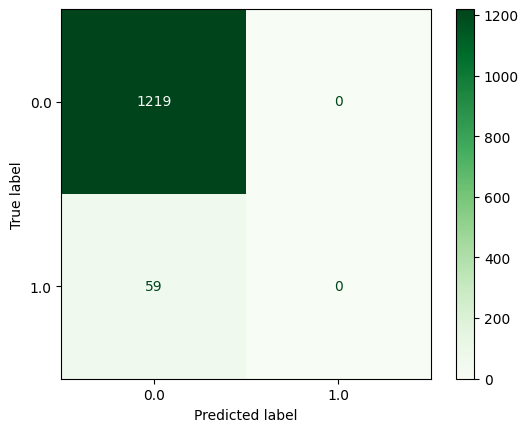

In [63]:
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Greens)

In [64]:
print('---------- SVM CLASSIFIER ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_svc))
print('Precision ', precision_score(y_test, y_pred_svc, average='macro'))
print('Recall ', recall_score(y_test, y_pred_svc, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_svc, average='macro'))

---------- SVM CLASSIFIER ----------
Accuracy  0.9538341158059468
Precision  0.4769170579029734
Recall  0.5
F1-Score 0.4881858229875851


### C. Hasil Decission Tree Classifier

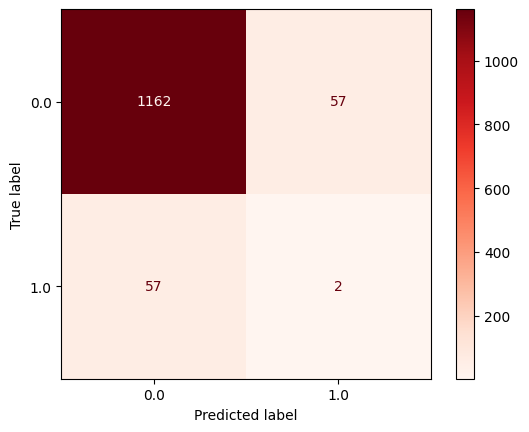

In [65]:
cm = confusion_matrix(y_test, y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds)

In [66]:
print('---------- DECISION TREE CLASSIFIER ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_dtc))
print('Precision ', precision_score(y_test, y_pred_dtc, average='macro'))
print('Recall ', recall_score(y_test, y_pred_dtc, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_dtc, average='macro'))

---------- DECISION TREE CLASSIFIER ----------
Accuracy  0.9107981220657277
Precision  0.49356933301817274
Recall  0.49356933301817274
F1-Score 0.49356933301817274


### D. Hasil K-Nearest Neighbor Classifier

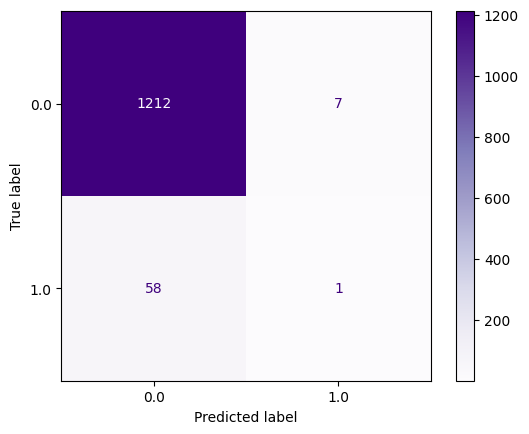

In [67]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Purples)

In [68]:
print('---------- KNN CLASSIFIER ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_knn))
print('Precision ', precision_score(y_test, y_pred_knn, average='macro'))
print('Recall ', recall_score(y_test, y_pred_knn, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_knn, average='macro'))

---------- KNN CLASSIFIER ----------
Accuracy  0.9491392801251957
Precision  0.5396653543307086
Recall  0.5056033703647057
F1-Score 0.5018679203420423


## Kesimpulan

Dapat dilihat bahwa seluruh model mengeluarkan hasil yang kurang memuaskan, masih banyak pasien stroke yang diklasifikasikan sebagai yang sehat. Model yang memiliki performa di atas rata-rata adalah DTC dan KNN, namun tetap saja 'di atas' rata-rata ini masih kurang memuaskan bahkan dapat dibilang fatal. Hal ini dapat terjadi karena kurang tersebarnya dataset yang dimiliki.

Text(0.5, 1.0, 'Persentase Sehat dan Pengidap Stroke')

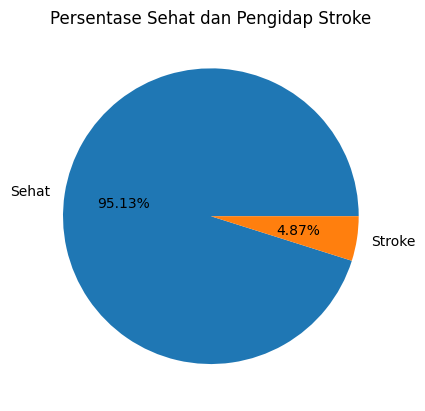

In [69]:
labels = 'Sehat', 'Stroke'
healthy = df['stroke'].value_counts()[0]
stroke = df['stroke'].value_counts()[1]
sizes = [healthy, stroke]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Persentase Sehat dan Pengidap Stroke')

In [70]:
print('Pasien sehat: ', healthy)
print('Pasien stroke: ', stroke)

Pasien sehat:  4861
Pasien stroke:  249


Melihat kembali penyebaran data pasien stroke, kurang dari 5% direpresentasikan pada dataset ini. Satu hal yang dapat dicoba adalah upsampling pasien yang sehat supaya memiliki data yang sama rata dengan pasien stroke.

In [71]:
from sklearn.utils import resample

# Majority -> mayoritas, merujuk pada data pasien sehat
# Minority -> minoritas, merujuk pada data pasien stroke

df_majority = df[df['stroke'] == 0]
df_minority = df[df['stroke'] == 1]

# Upsampling data minoritas
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

Text(0.5, 1.0, 'Persentase Sehat dan Pengidap Stroke')

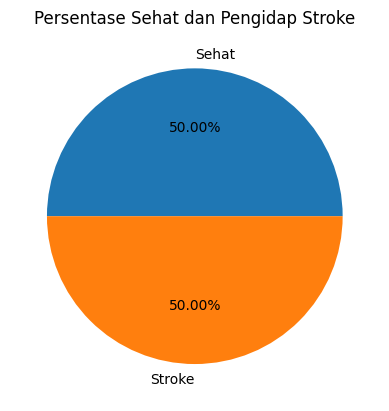

In [72]:
labels = 'Sehat', 'Stroke'
healthy = df_balanced['stroke'].value_counts()[0]
stroke = df_balanced['stroke'].value_counts()[1]
sizes = [healthy, stroke]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Persentase Sehat dan Pengidap Stroke')

In [73]:
print('Pasien sehat: ', healthy)
print('Pasien stroke: ', stroke)

Pasien sehat:  4861
Pasien stroke:  4861


Dengan menggunakan teknik upsampling, kita dapat membuat duplikat dari kelas minoritas dan membuatnya seimbang dengan kelas mayoritas. Melakukan seluruh teknik di atas, untuk klasifikasi ulang.

## Melakukan Ulang

In [74]:
df_X = df_balanced.drop(['id', 'stroke', 'gender', 'hypertension',
                        'heart_disease', 'ever_married', 'work_type',
                        'Residence_type', 'avg_glucose_level', 'smoking_status'], axis = 1)
df_y = df_balanced['stroke']

In [75]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df_y)

cats = df_X.select_dtypes(include=['int', 'float']).columns
cat_features = list(cats.values)

In [76]:
X= df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=404)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
# Inisialisasi model yang akan digunakan untuk klasifikasi

model_logres = LogisticRegression()             # Logistic regression
model_svc = SVC(kernel="linear")                # Support Vector Machine Classifier
model_dtc = DecisionTreeClassifier()            # Decission Tree Classifier
model_knn = KNeighborsClassifier(n_neighbors=5) # K-Nearest Neighbor Classifier

# Model fitting

model_logres.fit(X_train, y_train)
model_svc.fit(X_train, y_train)
model_dtc.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

# Model predict

y_pred_logres = model_logres.predict(X_test)
y_pred_svc = model_svc.predict(X_test)
y_pred_dtc = model_dtc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

### A. Hasil Ulang Logistic Regression

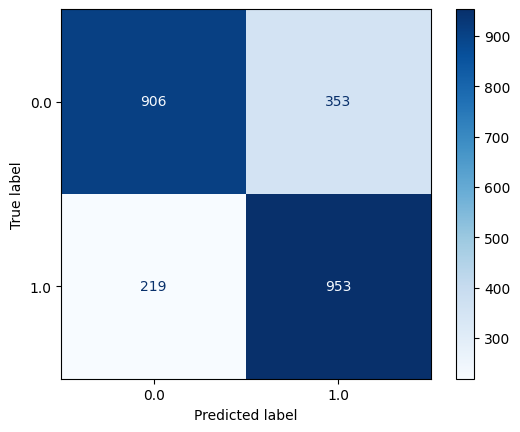

In [78]:
cm = confusion_matrix(y_test, y_pred_logres)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

In [79]:
print('---------- LOGISTIC REGRESSION ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_logres))
print('Precision ', precision_score(y_test, y_pred_logres, average='macro'))
print('Recall ', recall_score(y_test, y_pred_logres, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_logres, average='macro'))

---------- LOGISTIC REGRESSION ----------
Accuracy  0.7647058823529411
Precision  0.7675211842776928
Recall  0.7663793383881785
F1-Score 0.7646178992584407


### B. Hasil Ulang Support Vector Machine

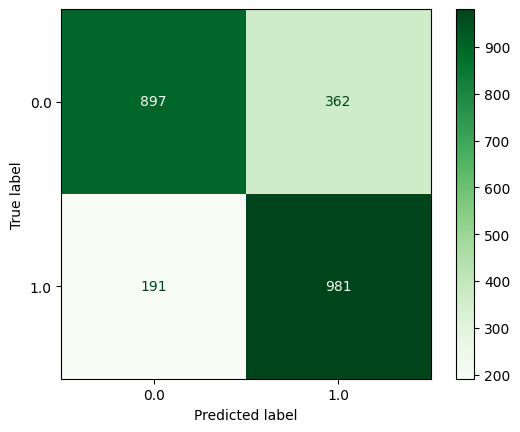

In [80]:
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Greens)

In [81]:
print('---------- SVM CLASSIFIER ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_svc))
print('Precision ', precision_score(y_test, y_pred_svc, average='macro'))
print('Recall ', recall_score(y_test, y_pred_svc, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_svc, average='macro'))

---------- SVM CLASSIFIER ----------
Accuracy  0.7725215960510078
Precision  0.7774513682055101
Recall  0.7747504655897335
F1-Score 0.7722496719724262


### C. Hasil Ulang Decission Tree Classifier

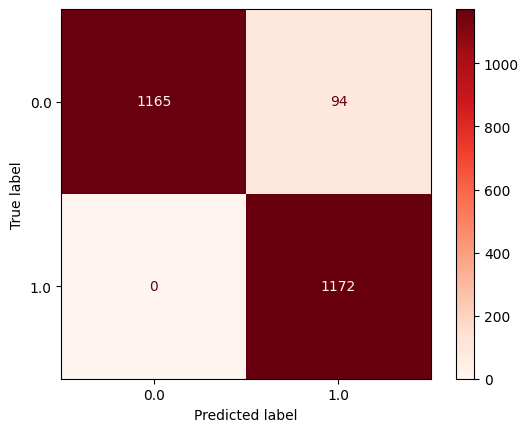

In [82]:
cm = confusion_matrix(y_test, y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds)

In [83]:
print('---------- DECISION TREE CLASSIFIER ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_dtc))
print('Precision ', precision_score(y_test, y_pred_dtc, average='macro'))
print('Recall ', recall_score(y_test, y_pred_dtc, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_dtc, average='macro'))

---------- DECISION TREE CLASSIFIER ----------
Accuracy  0.9613327848621966
Precision  0.962875197472354
Recall  0.9626687847498014
F1-Score 0.9613324642554493


### D. Hasil Ulang K-Nearest Neighbor Classifier

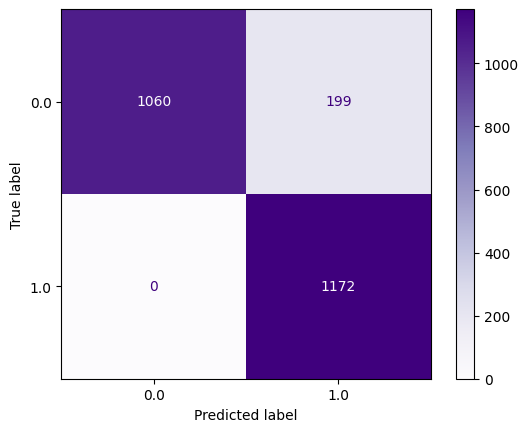

In [84]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Purples)

In [85]:
print('---------- KNN CLASSIFIER ----------')
print('Accuracy ', accuracy_score(y_test, y_pred_knn))
print('Precision ', precision_score(y_test, y_pred_knn, average='macro'))
print('Recall ', recall_score(y_test, y_pred_knn, average='macro'))
print('F1-Score', f1_score(y_test, y_pred_knn, average='macro'))

---------- KNN CLASSIFIER ----------
Accuracy  0.9181406828465652
Precision  0.9274252370532459
Recall  0.9209690230341541
F1-Score 0.9179665594805143


## Hasil Akhir

Dapat dilihat bahwa dengan menerapkan upsampling, hasil yang didapatkan jauh lebih baik dari hasil sebelumnya. Mengingatkan kita bahwa selain keahlian dalam kode, kita juga harus pandai dalam mengolah data.